# Описание проекта

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Даны данные до 2016 года. 

# Описание данных

<ul>
<li>Name — название игры</li>
<li>Platform — платформа</li>
<li>Year_of_Release — год выпуска</li>
<li>Genre — жанр игры</li>
<li>NA_sales — продажи в Северной Америке (миллионы проданных копий)</li>
<li>EU_sales — продажи в Европе (миллионы проданных копий)</li>
<li>JP_sales — продажи в Японии (миллионы проданных копий)</li>
<li>Other_sales — продажи в других странах (миллионы проданных копий)</li>
<li>Critic_Score — оценка критиков (максимум 100)</li>
<li>User_Score — оценка пользователей (максимум 10)</li>
<li>Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.</li>
</ul>

# Изучение данных из файла 

In [1]:
import pandas as pd
import numpy as np
from statistics import mean
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
games = pd.read_csv('games.csv')
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<b>Вывод:</b> можно заметить, что в 6 столбцах(Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating) присутствуют нулевые значения. Также названия столбцов следуют привести к нижнему регистру. Следует также проверить регистр в данных некоторых столбцов и привести данные в некоторых столбцах к нужному типу.

# Подготовка данных

## Приведение названий столбцов к нижнему регистру

In [4]:
games.columns = games.columns.str.lower()
print(games.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


## Приведение данных к нужному типу

Требуется заменить тип данных в столбце year_of_release. Так как в данной столбце содержится только год (целое число) и здесь не требуется дробной части. Данное преобразование пройдет уже после заполнения данного столбца значениями.

## Обработка пропусков

В столбце name есть 2 пропущенных значения. Из нужно удалить, так как название игры мы никак не узнаем и 2 записи никак не повлияют на весь датафрейм. 

In [5]:
games = games.dropna(subset = ['name']).reset_index(drop = True)
print(games.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


В столбце year_of_release есть пропущенные значения. Можно посмотреть, присутствует ли уже такая игра и узнать по ней год выпуска. А оставшиеся значения заполнить средним по столбцу.

In [6]:
name_year = games.groupby('name')['year_of_release'].apply(list).to_dict() #создаем словарь, где ключ это название, а значение - все значения лет
for key in name_year:
    name_year[key] = [x for x in name_year[key] if str(x) != 'nan'] #удаляем значения nan из значений словаря
    if name_year[key]:
        name_year[key] = mean(name_year[key]) #делаем среднее, где значение является непустым списком
name_year = {key:name_year[key] for key in name_year if name_year[key] != []} #удаляем пустые списки из значений словаря

games['year_of_release'] = games['year_of_release'].fillna(games['name'].apply(lambda x: name_year.get(x)))
games = games.dropna(subset = ['year_of_release']).reset_index(drop = True)
games['year_of_release'] = games['year_of_release'].astype('int')
print(games.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16567 entries, 0 to 16566
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  int32  
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     8075 non-null   float64
 9   user_score       9934 non-null   object 
 10  rating           9868 non-null   object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.3+ MB
None


Заменим значения в столбце user_score. Здесь присутствует такое значение, как 'tbd' - to be determined - будут определены. Поэтому пока эти значения не определены, можно заменить из на nan. И преобразуем данный столбец в тип float.

In [7]:
games['user_score'] = games['user_score'].replace('tbd', np.nan)
games['user_score'] = games['user_score'].astype('float')
print(games.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16567 entries, 0 to 16566
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  int32  
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     8075 non-null   float64
 9   user_score       7540 non-null   float64
 10  rating           9868 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.3+ MB
None


В столбцах critic_score, user_score, rating мы никак не можем предугадать значения. Поэтому оставим эти столбцы с нулевыми значенями.  

In [8]:
games['rating'] = games['rating'].replace('K-A', 'E')
games['rating'] = games['rating'].fillna('No rating')
print(games['rating'].unique())
print(games.info())

['E' 'No rating' 'M' 'T' 'E10+' 'AO' 'EC' 'RP']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16567 entries, 0 to 16566
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  int32  
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     8075 non-null   float64
 9   user_score       7540 non-null   float64
 10  rating           16567 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.3+ MB
None


## Суммарные продажи

In [9]:
games['all_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,No rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,No rating,31.38


# Исследовательский анализ данных

## Сколько игр выпускалось в разные годы?

Text(0, 0.5, 'количество игр')

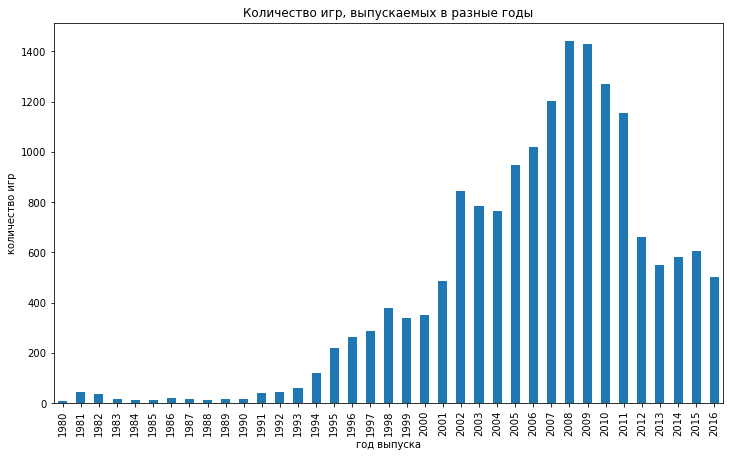

In [10]:
games_count = games.groupby('year_of_release')['name'].count()
games_count.plot(kind = 'bar', figsize = (12, 7), title = 'Количество игр, выпускаемых в разные годы')
plt.xlabel('год выпуска')
plt.ylabel('количество игр')

<b>Вывод:</b> можно заметить, что данных до 1994 года слишком мало. Данные за этот период не так важны. Пик графика приходится на 2008-2009 годы. После 2011 года идет резкий спад количества выпускаемых игр. В 2015 году было выпущено около 600 игр, если судить по графику. В 2016 году число выпущенных игр уже близко к данному значению, хотя год еще не закончился.

## Как менялись продажи по платформам?

Text(0, 0.5, 'количество игр')

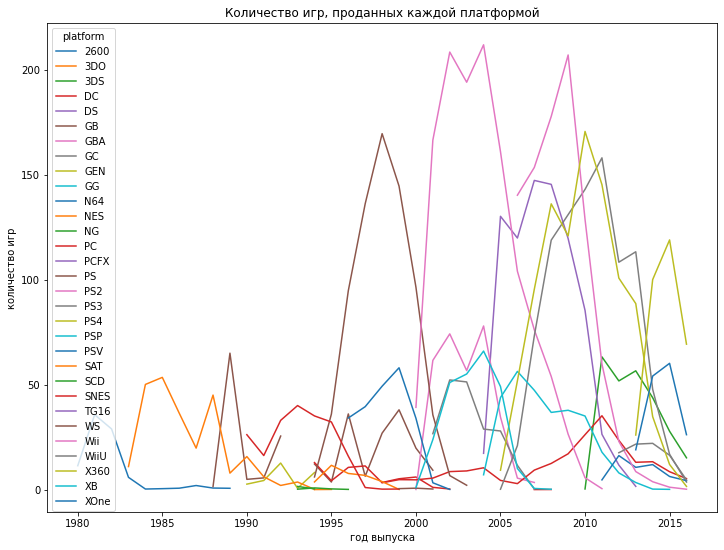

In [11]:
games_platform = games.pivot_table(index = 'year_of_release', columns = 'platform', values = 'all_sales', aggfunc = 'sum')
games_platform.plot(figsize = (12, 9), title = 'Количество игр, проданных каждой платформой')
plt.xlabel('год выпуска')
plt.ylabel('количество игр')

<b>Платформы лидирующие по продажам</b>

In [12]:
display(games.pivot_table(index = 'platform', values = 'all_sales', aggfunc = 'sum').sort_values(by = 'all_sales', ascending = False).head(10))

,all_sales
platform,
PS2,1247.16
X360,966.61
PS3,935.19
Wii,903.31
DS,804.28
PS,727.58
PS4,314.14
GBA,313.73
PSP,293.57


Наибольшие значения имеют следующие платформы: PS2, X360, PS3, Wii, DS, PS 

Text(0, 0.5, 'суммарные продажи')

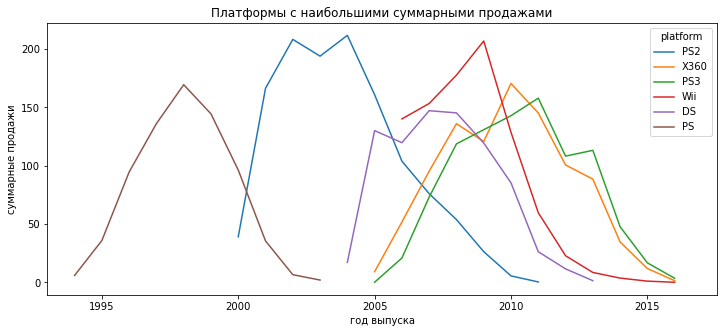

In [13]:
games_platform[['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']].plot(legend = True, figsize = (12, 5), xlim =(1993, None), title = 'Платформы с наибольшими суммарными продажами')
plt.xlabel('год выпуска')
plt.ylabel('суммарные продажи')

In [14]:
print('Продолжительность жизни популярных платформ:')
print(games_platform[['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']].count())

Продолжительность жизни популярных платформ:
platform
PS2     12
X360    12
PS3     13
Wii     11
DS      11
PS      10
dtype: int64


<b>Вывод:</b> платфорами с наибольшими суммарными продажами являются PS2, X360, PS3, Wii, DS, PS. Срок с появления платформы и до ее исчезновения составляет 10-13 лет.

## Данные за актуальный период

За актуальный период примем 3 года, так как именно в такой период времени идет подъем платформы. Компьютерные игры - очень инновационная отрасль, где каждый год случается революция, одна технология сменяет другую, да и экономические условия каждый год немного меняются. То есть возьмем данные за 2014-2016 годы.

In [15]:
actual_games = games.query('year_of_release >= 2014')
actual_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,No rating,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,No rating,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,No rating,7.98


## Какие платформы лидируют по продажам, растут или падают?

Text(0, 0.5, 'суммарные продажи')

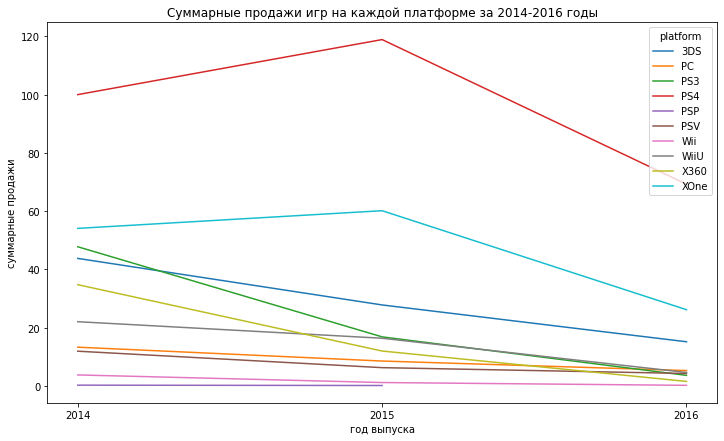

In [16]:
actual_games_platform = actual_games.pivot_table(index = 'year_of_release', columns = 'platform', values = 'all_sales', aggfunc = 'sum')
actual_games_platform.plot(figsize = (12, 7), title = 'Суммарные продажи игр на каждой платформе за 2014-2016 годы', xticks=[2014, 2015, 2016])
plt.xlabel('год выпуска')
plt.ylabel('суммарные продажи')

<b>Лидеры по продажам в актуальный период</b>

In [17]:
platform__all_sales = actual_games.pivot_table(index = 'platform', values = 'all_sales', aggfunc = 'sum')
display(platform__all_sales.sort_values(by = 'all_sales', ascending = False))

,all_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05
PSV,22.40
Wii,5.07


## График «ящик с усами» по глобальным продажам игр в разбивке по платформам

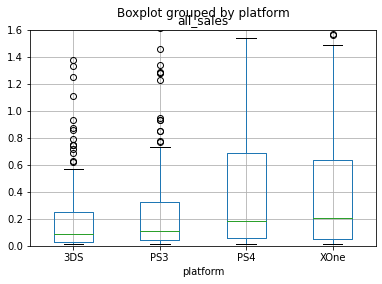

In [18]:
actual_games_platforms = actual_games.query('platform == "PS4" or platform == "XOne" or platform == "3DS" or platform == "PS3"')
actual_games_platforms.boxplot(column = 'all_sales', by = 'platform')
plt.ylim(0, 1.6)
plt.show()

По данному ящику с усами можно видеть, что во всех 4 графиках много данных нахоится выше верхней границы, что говорит о значительных выбросах. Медиана у платформ 3DS и PS3 близки по значения, а медиана платформы PS4 близка по значению к медиане платформы XOne. Выьросы платформы 3DS начинаются уже со значения 0.6

## Влияние отзывов пользователей и критиков на продажи внутри одной популярной платформы

       year_of_release    na_sales    eu_sales    jp_sales  other_sales  \
count       376.000000  376.000000  376.000000  376.000000   376.000000   
mean       2015.236702    0.262261    0.345851    0.039947     0.118298   
std           0.762336    0.583439    0.815480    0.067048     0.256506   
min        2014.000000    0.000000    0.000000    0.000000     0.000000   
25%        2015.000000    0.000000    0.000000    0.000000     0.000000   
50%        2015.000000    0.050000    0.070000    0.015000     0.020000   
75%        2016.000000    0.240000    0.280000    0.050000     0.102500   
max        2016.000000    6.030000    6.310000    0.490000     2.380000   

       critic_score  user_score   all_sales  
count    237.000000  242.000000  376.000000  
mean      72.164557    6.828099    0.766356  
std       12.214985    1.399035    1.614969  
min       19.000000    1.500000    0.010000  
25%       66.000000    6.200000    0.057500  
50%       73.000000    7.100000    0.185000  
75

Text(0.5, 1.0, 'Диаграмма размаха PS4')

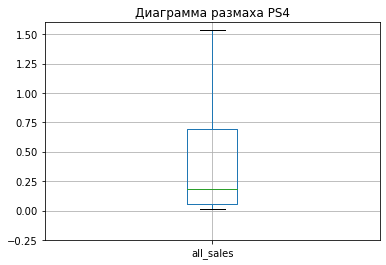

In [19]:
PS4 = actual_games.query('platform == "PS4"') #возьмем наиболее популярную платформу PS4
print(PS4.describe())
PS4.boxplot('all_sales')
plt.ylim(-0.25, 1.6)
plt.title('Диаграмма размаха PS4')

Данный ящик с усами показывает, что медиана около  0.19. Верхней границей является значение около 1.6, а нижней 0.

,critic_score,user_score,all_sales
critic_score,1.000000,0.557654,0.406568
user_score,0.557654,1.000000,-0.031957
all_sales,0.406568,-0.031957,1.000000


Text(0, 0.5, 'суммарные продажи')

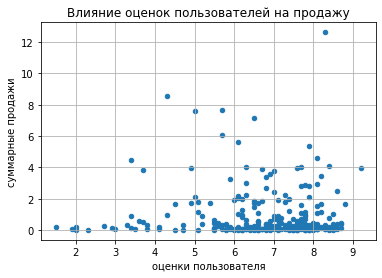

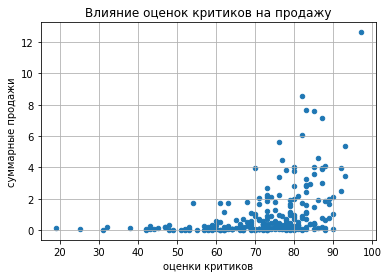

In [20]:
platforma_PS4 = games.query('platform == "PS4"')
display(platforma_PS4[['critic_score', 'user_score', 'all_sales']].corr())
platforma_PS4.plot(x = 'user_score', y = 'all_sales', grid = True, kind = 'scatter')
plt.title('Влияние оценок пользователей на продажу')
plt.xlabel('оценки пользователя')
plt.ylabel('суммарные продажи')
platforma_PS4.plot(x = 'critic_score', y = 'all_sales', grid = True, kind = 'scatter')
plt.title('Влияние оценок критиков на продажу')
plt.xlabel('оценки критиков')
plt.ylabel('суммарные продажи')

В данном случае оценки критиков в большей степени влияют на продажи, так как корреляция critical_score(0.406568) и all_sales будет выше, чем корреляция user_score(-0.031957) и all_sales. Корреляция между critical_score и all_sales считается низкой, а корреляция между user_score и all_sales очень низкой.

,critic_score,user_score,all_sales
critic_score,1.000000,0.472462,0.416998
user_score,0.472462,1.000000,-0.068925
all_sales,0.416998,-0.068925,1.000000


Text(0, 0.5, 'суммарные продажи')

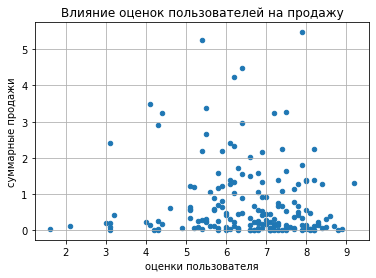

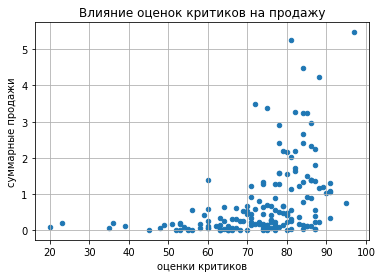

In [21]:
platforma_XOne = games.query('platform == "XOne"')
display(platforma_XOne[['critic_score', 'user_score', 'all_sales']].corr())
platforma_XOne.plot(x = 'user_score', y = 'all_sales', grid = True, kind = 'scatter')
plt.title('Влияние оценок пользователей на продажу')
plt.xlabel('оценки пользователя')
plt.ylabel('суммарные продажи')
platforma_XOne.plot(x = 'critic_score', y = 'all_sales', grid = True, kind = 'scatter')
plt.title('Влияние оценок критиков на продажу')
plt.xlabel('оценки критиков')
plt.ylabel('суммарные продажи')

В данном случае ситуация примерно такая же. Оценки критиков в большей степени влияют на продажи, так как корреляция critical_score(0.416998) и all_sales будет выше, чем корреляция user_score(-0.068925) и all_sales. Корреляция между critical_score и all_sales считается низкой, а корреляция между user_score и all_sales очень низкой.

,critic_score,user_score,all_sales
critic_score,1.000000,0.744286,0.348216
user_score,0.744286,1.000000,0.222305
all_sales,0.348216,0.222305,1.000000


Text(0, 0.5, 'суммарные продажи')

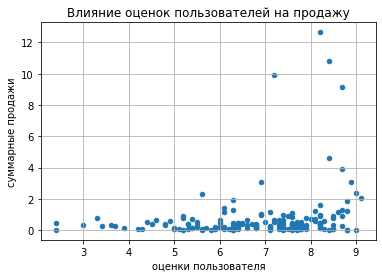

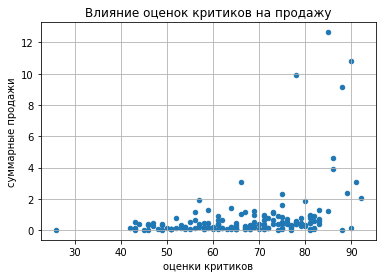

In [22]:
platforma_3DS = games.query('platform == "3DS"')
display(platforma_3DS[['critic_score', 'user_score', 'all_sales']].corr())
platforma_3DS.plot(x = 'user_score', y = 'all_sales', grid = True, kind = 'scatter')
plt.title('Влияние оценок пользователей на продажу')
plt.xlabel('оценки пользователя')
plt.ylabel('суммарные продажи')
platforma_3DS.plot(x = 'critic_score', y = 'all_sales', grid = True, kind = 'scatter')
plt.title('Влияние оценок критиков на продажу')
plt.xlabel('оценки критиков')
plt.ylabel('суммарные продажи')

В данном случае как оценка критиков, так и оценка пользователей в какой-то небольшой степени влияют на продажи.

,critic_score,user_score,all_sales
critic_score,1.000000,0.628833,0.432275
user_score,0.628833,1.000000,0.127811
all_sales,0.432275,0.127811,1.000000


Text(0, 0.5, 'суммарные продажи')

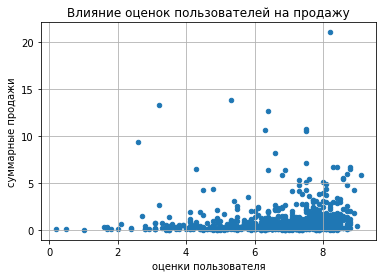

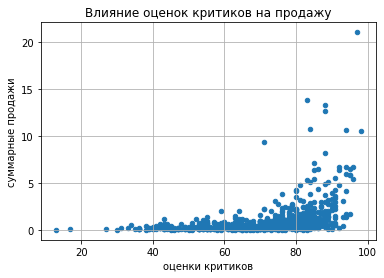

In [23]:
platforma_PS3 = games.query('platform == "PS3"')
display(platforma_PS3[['critic_score', 'user_score', 'all_sales']].corr())
platforma_PS3.plot(x = 'user_score', y = 'all_sales', grid = True, kind = 'scatter')
plt.title('Влияние оценок пользователей на продажу')
plt.xlabel('оценки пользователя')
plt.ylabel('суммарные продажи')
platforma_PS3.plot(x = 'critic_score', y = 'all_sales', grid = True, kind = 'scatter')
plt.title('Влияние оценок критиков на продажу')
plt.xlabel('оценки критиков')
plt.ylabel('суммарные продажи')

Здесь также оценка критиков влияет больше(0.432275), чем оценка пользователей(0.127811). Но все со слабой силой.

<b>Вывод:</b> из всего вышесказанного можно сделать вывод, что оценка критиков больше влияет на суммарные продажи нежеле оценка пользователей.

## Распределение игр по жанрам

Text(0, 0.5, 'количество игр')

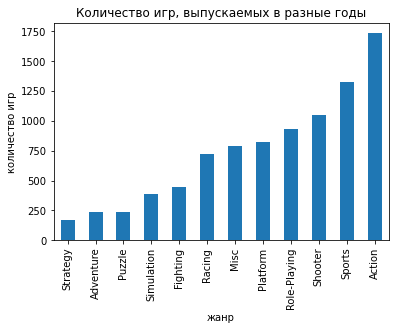

In [24]:
games_genre = games.groupby('genre')['all_sales'].sum().sort_values()
games_genre.plot(kind = 'bar', title = 'Количество игр, выпускаемых в разные годы')
plt.xlabel('жанр')
plt.ylabel('количество игр')

<b>Вывод:</b> игры в стиле action имееют наибольшие суммарные продажи, далее идет жанр sports, shooter и role-playing. К жанрам с низкими продажами можно отнести: adventure, puzzle и strategy.

# Портрет пользователя каждого региона

## Топ-5 популярных платформ для пользователей каждого региона

In [25]:
popular_platforms = actual_games.pivot_table(index = 'platform', values = ('na_sales', 'eu_sales', 'jp_sales'), aggfunc = 'sum')
display(popular_platforms)

,eu_sales,jp_sales,na_sales
platform,,,
3DS,16.12,44.24,22.64
PC,17.97,0.00,7.23
PS3,25.54,11.22,22.05
PS4,130.04,15.02,98.61
PSP,0.00,0.36,0.00
PSV,3.53,14.54,2.52
Wii,2.59,0.00,2.08
WiiU,13.15,7.31,19.36
X360,15.49,0.08,28.30


<b>Популярные платформы для пользователей в Европе</b>

,platform,eu_sales
0,PS4,130.04
1,XOne,46.25
2,PS3,25.54
3,PC,17.97
4,3DS,16.12


Text(0, 0.5, 'суммарные продажи')

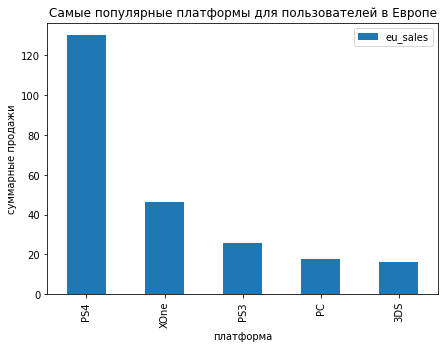

In [26]:
top_platforms_eu = popular_platforms['eu_sales'].sort_values(ascending = False).reset_index().head()
display(top_platforms_eu)
top_platforms_eu.plot(x = 'platform', kind = 'bar', figsize = (7, 5), title = 'Самые популярные платформы для пользователей в Европе')
plt.xlabel('платформа')
plt.ylabel('суммарные продажи')

Наиболее популярные платформы для Европы в актуальный период : PS4, XOne, PS3, PC, 3DS. 

In [27]:
top_platforms_eu_sum = top_platforms_eu['eu_sales'].sum()
for index in top_platforms_eu.index:
    print('Доля платформы {} ко всем платформам равна {:.2%}'.format(top_platforms_eu['platform'][index], top_platforms_eu['eu_sales'][index] / top_platforms_eu_sum))

Доля платформы PS4 ко всем платформам равна 55.12%
Доля платформы XOne ко всем платформам равна 19.60%
Доля платформы PS3 ко всем платформам равна 10.83%
Доля платформы PC ко всем платформам равна 7.62%
Доля платформы 3DS ко всем платформам равна 6.83%


<b>Популярные платформы для пользователей в Японии</b>

,platform,jp_sales
0,3DS,44.24
1,PS4,15.02
2,PSV,14.54
3,PS3,11.22
4,WiiU,7.31


Text(0, 0.5, 'суммарные продажи')

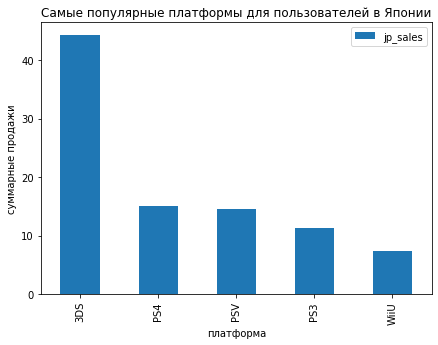

In [28]:
top_platforms_jp = popular_platforms['jp_sales'].sort_values(ascending = False).reset_index().head()
display(top_platforms_jp)
top_platforms_jp.plot(x = 'platform', kind = 'bar', figsize = (7, 5), title = 'Самые популярные платформы для пользователей в Японии')
plt.xlabel('платформа')
plt.ylabel('суммарные продажи')

Наиболее популярные платформы для Японии: 3DS, PS4, PSV, PS3, WiiU.

In [29]:
top_platforms_jp_sum = top_platforms_jp['jp_sales'].sum()
for index in top_platforms_jp.index:
    print('Доля платформы {} ко всем платформам равна {:.2%}'.format(top_platforms_jp['platform'][index], top_platforms_jp['jp_sales'][index] / top_platforms_jp_sum))

Доля платформы 3DS ко всем платформам равна 47.92%
Доля платформы PS4 ко всем платформам равна 16.27%
Доля платформы PSV ко всем платформам равна 15.75%
Доля платформы PS3 ко всем платформам равна 12.15%
Доля платформы WiiU ко всем платформам равна 7.92%


<b>Популярные платформы для пользователей в Северной Америке</b>

,platform,na_sales
0,PS4,98.61
1,XOne,81.27
2,X360,28.30
3,3DS,22.64
4,PS3,22.05


Text(0, 0.5, 'суммарные продажи')

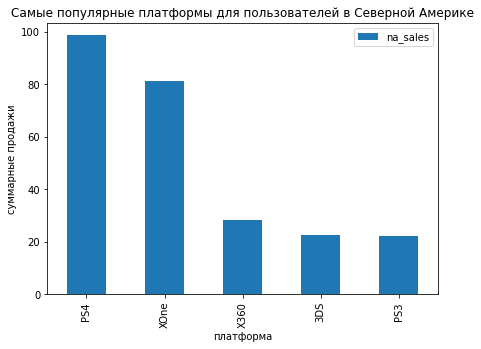

In [30]:
top_platforms_na = popular_platforms['na_sales'].sort_values(ascending = False).reset_index().head()
display(top_platforms_na)
top_platforms_na.plot(x = 'platform', kind = 'bar', figsize = (7, 5), title = 'Самые популярные платформы для пользователей в Северной Америке')
plt.xlabel('платформа')
plt.ylabel('суммарные продажи')

Наиболее популярные платформы для Северной Америки: PS4, XOne, X360, 3DS, PS3.

In [31]:
top_platforms_na_sum = top_platforms_na['na_sales'].sum()
for index in top_platforms_na.index:
    print('Доля платформы {} ко всем платформам равна {:.2%}'.format(top_platforms_na['platform'][index], top_platforms_na['na_sales'][index] / top_platforms_na_sum))

Доля платформы PS4 ко всем платформам равна 39.00%
Доля платформы XOne ко всем платформам равна 32.14%
Доля платформы X360 ко всем платформам равна 11.19%
Доля платформы 3DS ко всем платформам равна 8.95%
Доля платформы PS3 ко всем платформам равна 8.72%


## Топ-5 популярных жанров для пользователей каждого региона

In [32]:
popular_genres = actual_games.pivot_table(index = 'genre', values = ('na_sales', 'eu_sales', 'jp_sales'), aggfunc = 'sum')
display(popular_genres)

,eu_sales,jp_sales,na_sales
genre,,,
Action,74.68,29.58,72.53
Adventure,6.49,3.60,5.64
Fighting,6.69,6.37,12.43
Misc,12.86,5.61,15.05
Platform,6.80,2.69,6.79
Puzzle,0.52,0.93,0.65
Racing,14.13,1.76,8.74
Role-Playing,28.17,31.16,33.47
Shooter,65.52,4.87,79.02


<b>Популярные жарны для пользователей Европы</b>

,genre,eu_sales
0,Action,74.68
1,Shooter,65.52
2,Sports,45.73
3,Role-Playing,28.17
4,Racing,14.13


Text(0, 0.5, 'суммарные продажи')

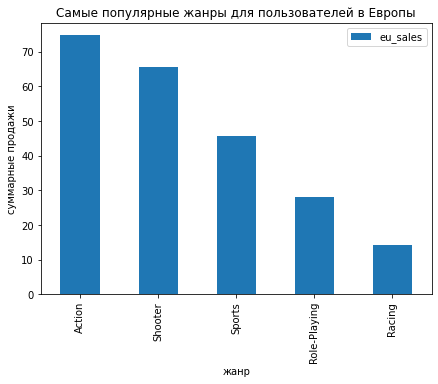

In [33]:
top_genres_eu = popular_genres['eu_sales'].sort_values(ascending = False).reset_index().head()
display(top_genres_eu)
top_genres_eu.plot(x = 'genre', kind = 'bar', figsize = (7, 5), title = 'Самые популярные жанры для пользователей в Европы')
plt.xlabel('жанр')
plt.ylabel('суммарные продажи')

Наиболее популярные жанры для Европы: Action, Shooter, Sports, Role-Playing и Racing.

<b>Популярные жарны для пользователей Японии</b>

,genre,jp_sales
0,Role-Playing,31.16
1,Action,29.58
2,Fighting,6.37
3,Misc,5.61
4,Shooter,4.87


Text(0, 0.5, 'суммарные продажи')

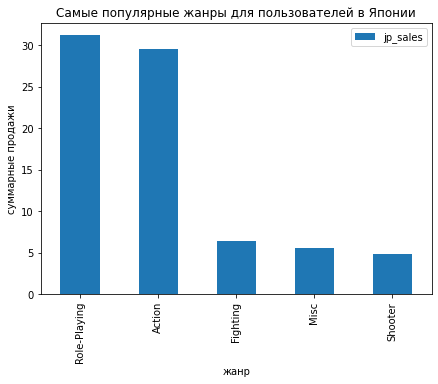

In [34]:
top_genres_jp = popular_genres['jp_sales'].sort_values(ascending = False).reset_index().head()
display(top_genres_jp)
top_genres_jp.plot(x = 'genre', kind = 'bar', figsize = (7, 5), title = 'Самые популярные жанры для пользователей в Японии')
plt.xlabel('жанр')
plt.ylabel('суммарные продажи')

Наиболее популярные жанры для Японии: Role-Playing, Action, Fighting, Misc и Shooter.

<b>Популярные жарны для пользователей Северной Америки</b>

,genre,na_sales
0,Shooter,79.02
1,Action,72.53
2,Sports,46.13
3,Role-Playing,33.47
4,Misc,15.05


Text(0, 0.5, 'суммарные продажи')

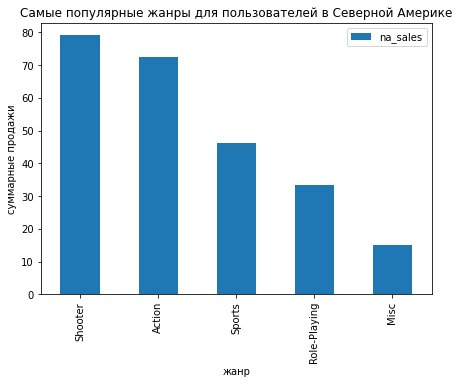

In [35]:
top_genres_na = popular_genres['na_sales'].sort_values(ascending = False).reset_index().head()
display(top_genres_na)
top_genres_na.plot(x = 'genre', kind = 'bar', figsize = (7, 5), title = 'Самые популярные жанры для пользователей в Северной Америке')
plt.xlabel('жанр')
plt.ylabel('суммарные продажи')

Наиболее популярные жанры для Северной Америки: Shooter, Action, Sports, Role-Playing и Misc.

## Влияет ли рейтинг ESRB на продажи в отдельном регионе?

,na_sales
rating,
M,96.42
No rating,64.72
E,50.74
T,38.95
E10+,33.23


Text(0, 0.5, 'суммарные продажи')

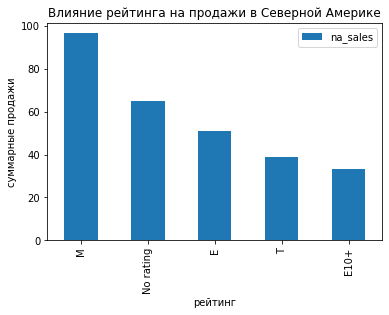

In [36]:
rating_ESRB_na = actual_games.pivot_table(index = 'rating', values = 'na_sales', aggfunc = 'sum').sort_values(by = 'na_sales', ascending = False).head()
display(rating_ESRB_na)
rating_ESRB_na.plot(kind = 'bar', title = 'Влияние рейтинга на продажи в Северной Америке')
plt.xlabel('рейтинг')
plt.ylabel('суммарные продажи')

В Северной Америке данный рейтинг влияет на продажи. В частности, больше всего влияет возрастная категория «M» («Mature») — «Для взрослых».

,eu_sales
rating,
M,93.44
No rating,58.95
E,58.06
T,34.07
E10+,26.16


Text(0, 0.5, 'суммарные продажи')

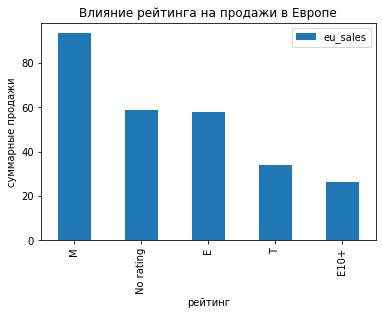

In [37]:
rating_ESRB_eu = actual_games.pivot_table(index = 'rating', values = 'eu_sales', aggfunc = 'sum').sort_values(by = 'eu_sales', ascending = False).head()
display(rating_ESRB_eu)
rating_ESRB_eu.plot(kind = 'bar', title = 'Влияние рейтинга на продажи в Европе')
plt.xlabel('рейтинг')
plt.ylabel('суммарные продажи')

В Европе данный рейтинг также влияет на продажи. В частности, больше всего влияет возрастная категория «M» («Mature») — «Для взрослых».

,jp_sales
rating,
No rating,56.90
T,14.78
E,8.94
M,8.01
E10+,4.46


Text(0, 0.5, 'суммарные продажи')

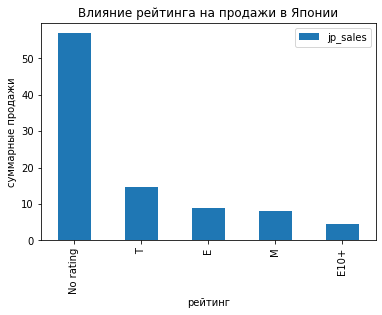

In [38]:
rating_ESRB_jp = actual_games.pivot_table(index = 'rating', values = 'jp_sales', aggfunc = 'sum').sort_values(by = 'jp_sales', ascending = False).head()
display(rating_ESRB_jp)
rating_ESRB_jp.plot(kind = 'bar', title = 'Влияние рейтинга на продажи в Японии')
plt.xlabel('рейтинг')
plt.ylabel('суммарные продажи')

На продажи игр в Японии данный рейтинг влияет крайне слабо.

<b>Вывод:</b> данный рейтинг больше всего влияет на продажи в Северной Америке (na_sales). Меньше всего влияет на продажи в Японии. Некоторые показатели рейтинга и вовсе не влияют ни на что.

# Проверка гипотез

<b>1 гипотеза:</b> средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H0: пользовательские рейтинги платформ Xbox One и PC будут равны. Альтернативная гипотеза H1: пользовательские рейтинги платформ не будут равны.

In [39]:
actual_games = actual_games.dropna(subset = ['user_score']).reset_index(drop = True)

Дисперсия для платформы Xbox One равна: 1.8910066518846989
Дисперсия для платформы PC равна: 2.9011543151334522
p-значение: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


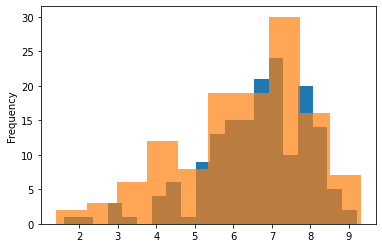

In [40]:
alpha = 0.05

Xbox_one = actual_games.query('platform == "XOne"')['user_score']
PC = actual_games.query('platform == "PC"')['user_score']

print('Дисперсия для платформы Xbox One равна:', Xbox_one.var())
print('Дисперсия для платформы PC равна:', PC.var())
#Дисперсии выборок действительно отличаются

Xbox_one.plot(kind = 'hist', bins = 20)
PC.plot(kind = 'hist', alpha = 0.7,)
#На графиках можно заметить, что распределение нельзя отнести к нормальному.

results = st.ttest_ind(Xbox_one, PC, equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Не получилось отвергнуть нулевую гипотезу. То есть есть вероятность, что пользовательские рейтинги платформ Xbox One и PC действительно будут равны.

<b>2 гипотеза:</b> Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

H0: средние пользовательские рейтинги жанров Action и Sports будут равны. Альтернативная гипотеза H1: средние пользовательские рейтинги жанров не будут равны.

Дисперсия для жанра Action равна: 1.898476658476659
Дисперсия для жанра Sports равна: 3.4469791276090476
p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


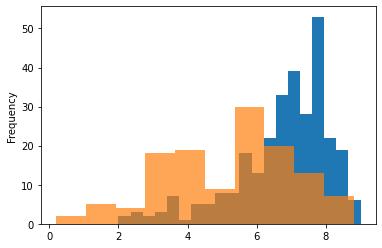

In [41]:
alpha = 0.05

action = actual_games.query('genre == "Action"')['user_score']
sports = actual_games.query('genre == "Sports"')['user_score']

print('Дисперсия для жанра Action равна:', action.var())
print('Дисперсия для жанра Sports равна:', sports.var())
#Дисперсии выборок действительно отличаются

action.plot(kind = 'hist', bins = 20)
sports.plot(kind = 'hist', alpha = 0.7)
#На графиках можно заметить, что распределение нельзя отнести к нормальному.

results = st.ttest_ind(action, sports, equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Принимает альтернативную гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports не будут равны.

<b>Вывод:</b> в данном случае применялся метод scipy.stats.ttest_ind (array1, array2, equal_var), так как имеется 2 генеральные совокупности. equal_var передавался как False, так как не считаем дисперсии генеральных совокупностей равными. Уровень значимости был выбран в 5%, так как он считается наиболее надежным и наиболее часто используется и подходит для нашей задачи.

# Общий вывод

Исходные данные были подготовлены, то есть приведены к нужному типу данных и избавлены от пропусков. Был определен актуальный период, во время которого идут самые активные продажи. В нашем случае этот период составил 3 года. Были определены платформы, которые являются наиболее актуальными сейчас: PS3, X360, PS4 и 3DS. Также были определены самые популярные платформы и жанры по различным регионам. В ходе проекта были проверены 2 гипотезы. Первая о равенстве средних пользовательских рейтингов платформ Xbox One и PC. Данная гипотеза была подтверждена. И вторая гипотеза о равенстве средних пользовательских рейтингов жанров Action и Sports. Данная гипотеза была отвергнула, то есть вероятно, что рейтинги все-таки разные. 